In [9]:
import keras,os,shutil

In [10]:
train_dir='./images1/images/train'
validation_dir='./images1/images/validation'

In [4]:
len(os.listdir(train_dir)),len(os.listdir(validation_dir))

(7, 7)

In [5]:
trainangry='./images1/images/train/angry'
traindisgust='./images1/images/train/disgust'
trainfear='./images1/images/train/fear'
trainhappy='./images1/images/train/happy'
trainneutral='./images1/images/train/neutral'
trainsad='./images1/images/train/sad'
trainsurprise='./images1/images/train/surprise'

In [6]:
len(os.listdir(trainangry)),len(os.listdir(traindisgust)),len(os.listdir(trainfear)),len(os.listdir(trainhappy)),len(os.listdir(trainneutral)),len(os.listdir(trainsad)),len(os.listdir(trainsurprise))

(3993, 436, 4103, 7164, 4982, 4938, 3205)

In [7]:
validangry='./images1/images/validation/angry'
validdisgust='./images1/images/validation/disgust'
validfear='./images1/images/validation/fear'
validhappy='./images1/images/validation/happy'
validneutral='./images1/images/validation/neutral'
validsad='./images1/images/validation/sad'
validsurpise='./images1/images/validation/surprise'

In [8]:
len(os.listdir(validangry)),len(os.listdir(validdisgust)),len(os.listdir(validfear)),len(os.listdir(validhappy)),len(os.listdir(validneutral)),len(os.listdir(validsad)),len(os.listdir(validsurpise))

(960, 111, 1018, 1825, 1216, 1139, 797)

In [12]:
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(64, (3, 3),padding='same', activation='relu',input_shape=(48, 48, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3),padding='same' ,activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3),padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(512, (3, 3),padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 256)      

In [4]:
from keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=1e-4),metrics=['accuracy'])

In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(48, 48),
                                                    batch_size=64,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(48, 48),
                                                        batch_size=64,
                                                        class_mode='categorical')

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [6]:
from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',patience=2,verbose=1,factor=0.1,min_lr=0.0001)
filepath='model.weights11.h5'
checkpoint=ModelCheckpoint(filepath,monitor='val_accuracy',save_best_only=True,mode='max',verbose=1)

callbacks = [checkpoint,reduce_lr]

In [7]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=450,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=110,
      callbacks=callbacks)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
450/450 [==============================] - 946s 2s/step - loss: 1.8293 - accuracy: 0.2424 - val_loss: 1.8558 - val_accuracy: 0.2582

Epoch 00001: val_accuracy improved from -inf to 0.25824, saving model to model.weights11.h5
Epoch 2/50
450/450 [==============================] - 497s 1s/step - loss: 1.7794 - accuracy: 0.2696 - val_loss: 1.6686 - val_accuracy: 0.3508

Epoch 00002: val_accuracy improved from 0.25824 to 0.35076, saving model to model.weights11.h5
Epoch 3/50
450/450 [==============================] - 516s 1s/step - loss: 1.6053 - accuracy: 0.3694 - val_loss: 1.3148 - val_accuracy: 0.4239

Epoch 00003: val_accuracy improved from 0.35076 to 0.42388, saving model to model.weights11.h5
Epoch 4/50
450/450 [==============================] - 540s 1s/step - loss: 1.4836 - accuracy: 0.4270 - val_loss: 1.4025 - val_accuracy: 0.4613

Epoch 00004: val_accuracy improved from 0.42388 to 0.46130, saving model to model.weights11.h5


Epoch 00036: val_accuracy did not improve from 0.64125
Epoch 37/50
450/450 [==============================] - 525s 1s/step - loss: 0.3341 - accuracy: 0.8800 - val_loss: 1.6133 - val_accuracy: 0.6231

Epoch 00037: val_accuracy did not improve from 0.64125
Epoch 38/50
450/450 [==============================] - 522s 1s/step - loss: 0.3140 - accuracy: 0.8870 - val_loss: 1.3429 - val_accuracy: 0.6302

Epoch 00038: val_accuracy did not improve from 0.64125
Epoch 39/50
450/450 [==============================] - 523s 1s/step - loss: 0.3017 - accuracy: 0.8918 - val_loss: 1.5887 - val_accuracy: 0.6354

Epoch 00039: val_accuracy did not improve from 0.64125
Epoch 40/50
450/450 [==============================] - 521s 1s/step - loss: 0.2864 - accuracy: 0.8971 - val_loss: 1.6216 - val_accuracy: 0.6317

Epoch 00040: val_accuracy did not improve from 0.64125
Epoch 41/50
450/450 [==============================] - 523s 1s/step - loss: 0.2798 - accuracy: 0.8972 - val_loss: 1.4959 - val_accuracy: 0.6345


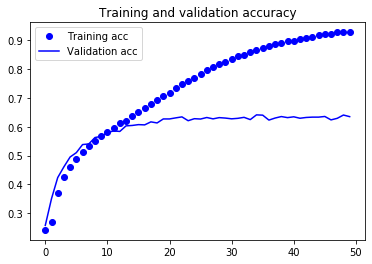

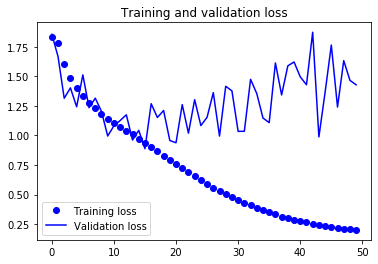

In [8]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()